<a href="https://colab.research.google.com/github/athiniotim/Final_Essay_Forest_Fires/blob/main/forest_fires_athensvoice_sentiment_analysis_Michaela_Athinioti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 54.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
forest_fires_athensvoice_df = pd.read_csv("/content/gdrive/MyDrive/Final Essay ΕΔΔΕ.2 Αθηνιώτη Μιχαέλα/clean csv/forest_fires_athensvoice_articles_csv.csv")

In [ ]:
len(forest_fires_athensvoice_df)

624

In [ ]:
forest_fires_athensvoice_df['date_dt'] = pd.to_datetime(forest_fires_athensvoice_df['date'], format='%Y-%m-%d')
forest_fires_athensvoice_df['time_dt'] = pd.to_datetime(forest_fires_athensvoice_df['time'], format='%H:%M:%S')
forest_fires_athensvoice_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
subtitle,object
text_body,object
feat_img_link,object


In [ ]:
forest_fires_athensvoice_df.head(5)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link,date_dt,time_dt
0,https://www.athensvoice.gr/epikairotita/diethn...,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29,10:40:50,Κοσμος,Newsroom,Ουρανοξύστες και ναοί φτιαγμένοι από πάγο στο ...,Το πάρκο έχει έκταση ενός εκατομμυρίου τετραγω...,"Διάφορα κτίρια-ορόσημα του Χονγκ Κονγκ, του Μα...",https://www.athensvoice.gr/images/1074x600/jpg...,2024-12-29,1900-01-01 10:40:50
1,https://www.athensvoice.gr/epikairotita/diethn...,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27,11:26:13,Κοσμος,Newsroom,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,Φόβοι για την ασφάλεια των πτήσεων,Η Azerbaijan Airlines ανακοίνωσε ότι διακόπτει...,https://www.athensvoice.gr/images/1074x600/1/j...,2024-12-27,1900-01-01 11:26:13
2,https://www.athensvoice.gr/epikairotita/diethn...,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25,15:02:24,Κοσμος,Newsroom,Ο Ρώσος Πρόεδρος Βλαντιμίρ Πούτιν δήλωσε ότι κ...,Ο Βλαντιμίρ Πούτιν υποστηρίζει την εκτεταμένη ...,Εταιρείες στη Ρωσία ξεκίνησαν να χρησιμοποιούν...,https://www.athensvoice.gr/images/1074x600/1/j...,2024-12-25,1900-01-01 15:02:24
3,https://www.athensvoice.gr/epikairotita/politi...,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,2024-12-19,10:11:59,Πολιτικη & Οικονομια,Newsroom,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,Η βουλευτής Βόρειου Τομέα του ΠΑΣΟΚ σημειώνει ...,"Το μείζον θέμα των υπέρογκων, διαδοχικών και α...",https://www.athensvoice.gr/images/1074x600/1/j...,2024-12-19,1900-01-01 10:11:59
4,https://www.athensvoice.gr/life/perivallon/882...,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,2024-12-17,18:12:54,Περιβαλλον,Newsroom,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,Εθνικό Αστεροσκοπείο Αθηνών και WWF Ελλάς εγκα...,Η ολοκληρωμένη ανασκόπηση της αντιπυρικής περι...,https://www.athensvoice.gr/images/1074x600/jpg...,2024-12-17,1900-01-01 18:12:54


In [ ]:
len(forest_fires_athensvoice_df)

624

In [ ]:
forest_fires_athensvoice_df.loc[:, 'full_text'] = (
    forest_fires_athensvoice_df['title'].fillna('') +
    ' ' +
    forest_fires_athensvoice_df['subtitle'].fillna('') +
    ' ' +
    forest_fires_athensvoice_df['excerpt'].fillna('') +
    ' ' +
    forest_fires_athensvoice_df['text_body'].fillna('')
)

In [ ]:
short_sa_forest_fires_athensvoice_df = forest_fires_athensvoice_df[['date_dt', "time_dt",'full_text' ]]
short_sa_forest_fires_athensvoice_df = short_sa_forest_fires_athensvoice_df.rename(columns={'full_text': 'text'} )
short_sa_forest_fires_athensvoice_df['time_dt'] = short_sa_forest_fires_athensvoice_df['time_dt'].dt.strftime('%H:%M:%S')

In [ ]:
len(short_sa_forest_fires_athensvoice_df)

624

In [ ]:
short_sa_forest_fires_athensvoice_df.head()

,date_dt,time_dt,text
0,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...
1,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...
2,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...
3,2024-12-19,10:11:59,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...
4,2024-12-17,18:12:54,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...


In [ ]:
short_sa_forest_fires_athensvoice_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object


In [ ]:
short_sa_forest_fires_athensvoice_df['datetime'] = pd.to_datetime(
    short_sa_forest_fires_athensvoice_df['date_dt'].astype(str) + ' ' + short_sa_forest_fires_athensvoice_df['time_dt'],
    errors='coerce'
)

In [ ]:
short_sa_forest_fires_athensvoice_df['datetime'] = pd.to_datetime(short_sa_forest_fires_athensvoice_df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
short_sa_forest_fires_athensvoice_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object
datetime,datetime64[ns]


In [ ]:
# εαν θέλουμε να πετάξουμε urls που μπορεί να υπάρχουν στο κείμενο
short_sa_forest_fires_athensvoice_df['text'] = short_sa_forest_fires_athensvoice_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
short_sa_forest_fires_athensvoice_df.head()

,date_dt,time_dt,text,datetime
0,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29 10:40:50
1,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27 11:26:13
2,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25 15:02:24
3,2024-12-19,10:11:59,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,2024-12-19 10:11:59
4,2024-12-17,18:12:54,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,2024-12-17 18:12:54


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_sa_forest_fires_athensvoice_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(624, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

,0
0,0
1,1
2,5
3,2
4,5
...,...
619,19
620,6
621,1
622,4


In [ ]:
short_sa_forest_fires_athensvoice_df.head(3)

,date_dt,time_dt,text,datetime
0,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29 10:40:50
1,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27 11:26:13
2,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25 15:02:24


In [ ]:
short_sa_forest_fires_athensvoice_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_sa_forest_fires_athensvoice_df

,date_dt,time_dt,text,datetime,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29 10:40:50,0,0,0,2,0,0,1,0,0,3
1,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27 11:26:13,1,3,1,2,0,1,4,0,1,1
2,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25 15:02:24,0,6,1,1,1,5,1,0,2,1
3,2024-12-19,10:11:59,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,2024-12-19 10:11:59,0,0,0,0,0,2,0,0,0,0
4,2024-12-17,18:12:54,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,2024-12-17 18:12:54,1,13,0,0,0,5,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2023-01-11,19:33:40,ΤΧΣ: Οι βασικές αρχές της στρατηγικής αποεπένδ...,2023-01-11 19:33:40,2,42,1,5,1,19,6,2,6,12
620,2023-01-09,13:23:00,Με λουλούδια και μάσκες υποδέχονται τους Κινέζ...,2023-01-09 13:23:00,3,4,1,3,2,6,3,5,9,4
621,2023-01-08,23:24:58,Μαζικές συλλήψεις στη Βραζιλία μετά την εισβολ...,2023-01-08 23:24:58,3,3,1,0,0,1,0,0,5,3
622,2023-01-08,11:55:00,Ανοίγουν αύριο τα σχολεία χωρίς υποχρεωτική μά...,2023-01-08 11:55:00,6,13,7,2,4,4,8,3,11,7


In [ ]:
short_sa_forest_fires_athensvoice_df.reset_index(inplace=True)
short_sa_forest_fires_athensvoice_df.set_index('datetime', inplace=True)
short_sa_forest_fires_athensvoice_df

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2024-12-29 10:40:50,0,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,0,0,0,2,0,0,1,0,0,3
2024-12-27 11:26:13,1,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,1,3,1,2,0,1,4,0,1,1
2024-12-25 15:02:24,2,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,0,6,1,1,1,5,1,0,2,1
2024-12-19 10:11:59,3,2024-12-19,10:11:59,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,0,0,0,0,0,2,0,0,0,0
2024-12-17 18:12:54,4,2024-12-17,18:12:54,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,1,13,0,0,0,5,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 19:33:40,619,2023-01-11,19:33:40,ΤΧΣ: Οι βασικές αρχές της στρατηγικής αποεπένδ...,2,42,1,5,1,19,6,2,6,12
2023-01-09 13:23:00,620,2023-01-09,13:23:00,Με λουλούδια και μάσκες υποδέχονται τους Κινέζ...,3,4,1,3,2,6,3,5,9,4
2023-01-08 23:24:58,621,2023-01-08,23:24:58,Μαζικές συλλήψεις στη Βραζιλία μετά την εισβολ...,3,3,1,0,0,1,0,0,5,3


<Axes: xlabel='datetime'>

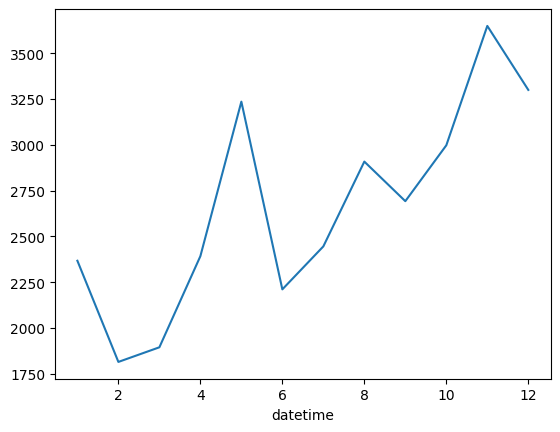

In [ ]:
short_sa_forest_fires_athensvoice_df['text'].str.len().groupby(by=short_sa_forest_fires_athensvoice_df.index.month).mean().plot()

<Axes: xlabel='datetime'>

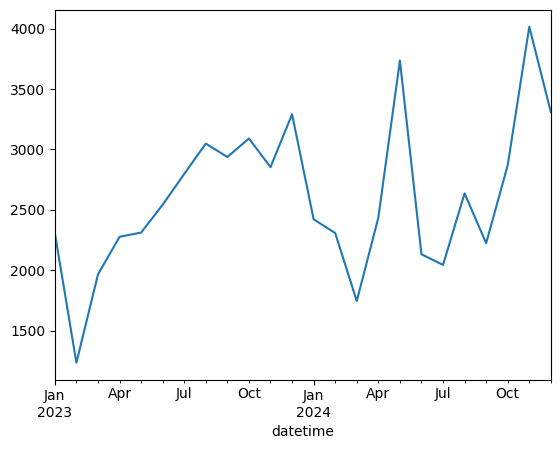

In [ ]:
short_sa_forest_fires_athensvoice_df['text'].str.len().resample('ME').mean().plot()

<Axes: ylabel='datetime'>

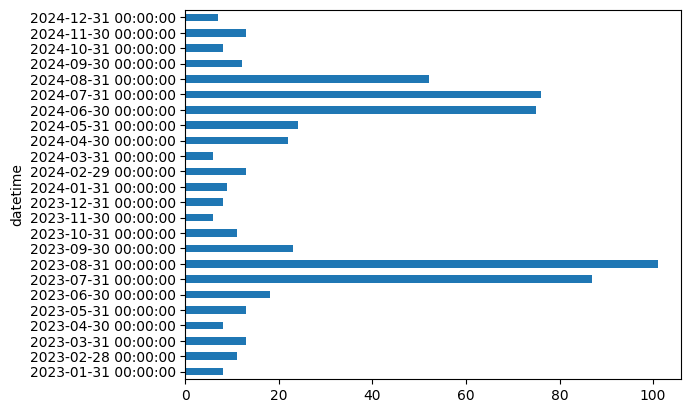

In [ ]:
short_sa_forest_fires_athensvoice_df['text'].resample('ME').count().plot(kind='barh')

<Axes: xlabel='datetime'>

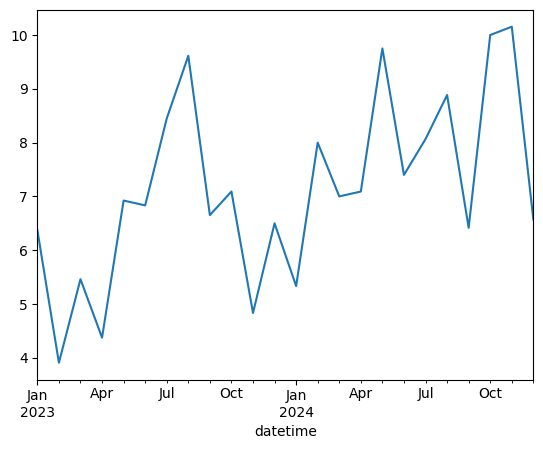

In [ ]:
short_sa_forest_fires_athensvoice_df['fear'].resample('ME').mean().plot()

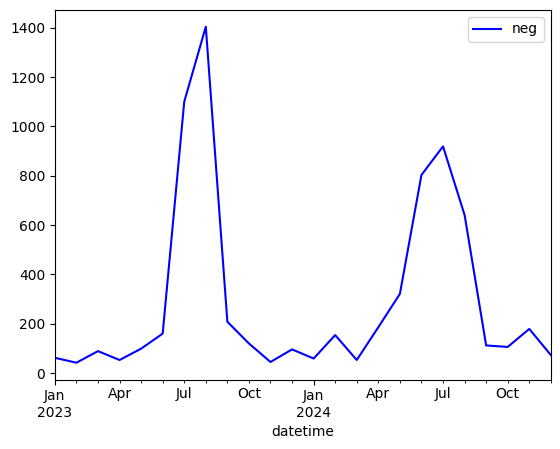

In [ ]:
short_sa_forest_fires_athensvoice_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

Αν έχουμε μεγάλη timeseries μπορούμε να μεγαλώσουμε το μήκος του γρφήματος

<Axes: xlabel='datetime'>

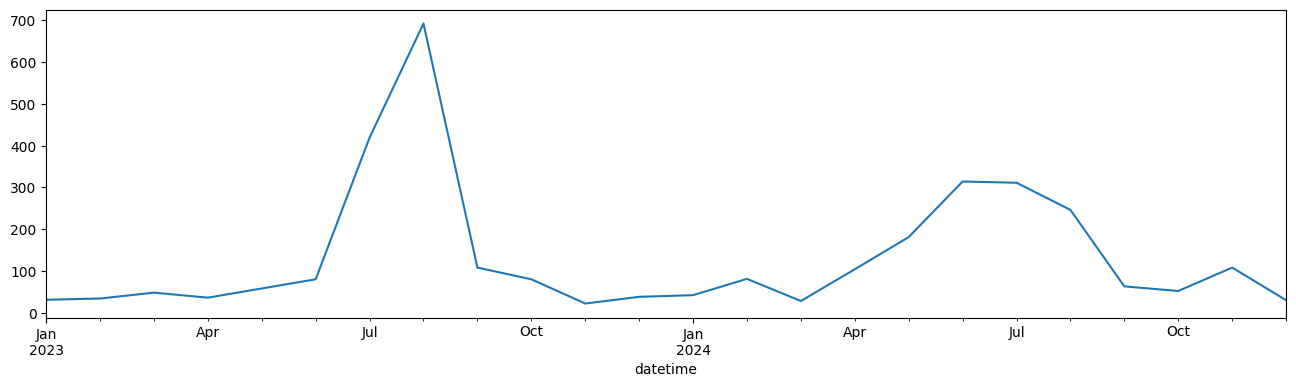

In [ ]:
short_sa_forest_fires_athensvoice_df['anger'].resample('ME').sum().plot(figsize=(16,4))

Μπορούμε να εμφανίσουμε πολλά linecharts στο ίδιο γράφημα

<Axes: xlabel='datetime'>

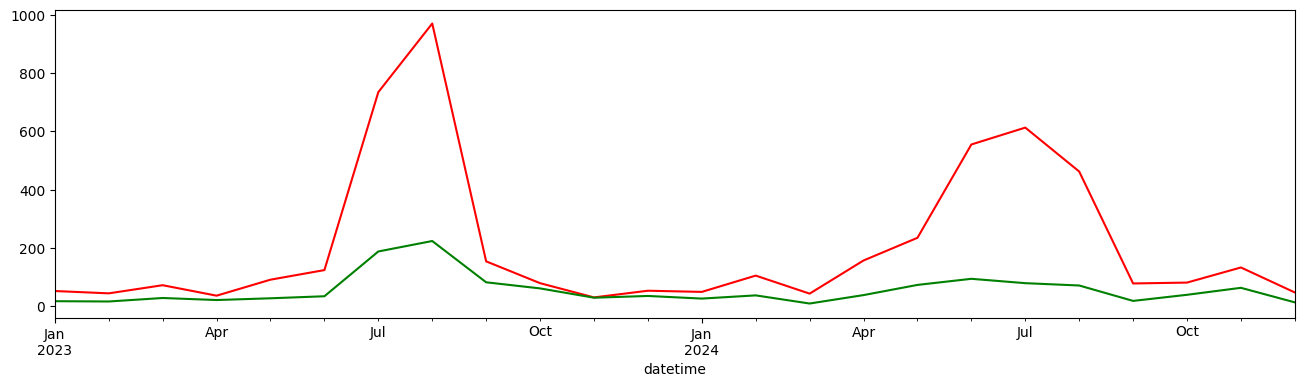

In [ ]:
ax = short_sa_forest_fires_athensvoice_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_athensvoice_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='datetime'>

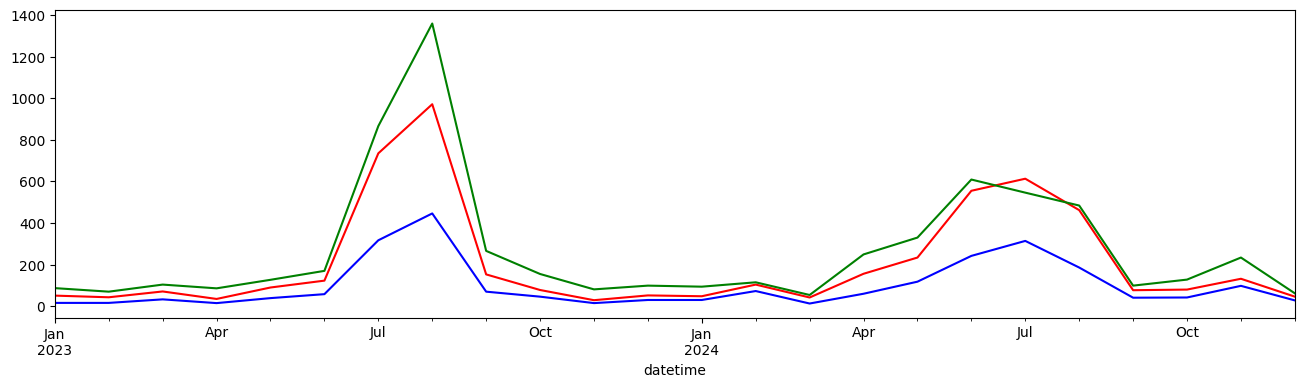

In [ ]:
ax = short_sa_forest_fires_athensvoice_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_athensvoice_df['positive'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_sa_forest_fires_athensvoice_df['sadness'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
# plt.style.use('ggplot')
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-bright')

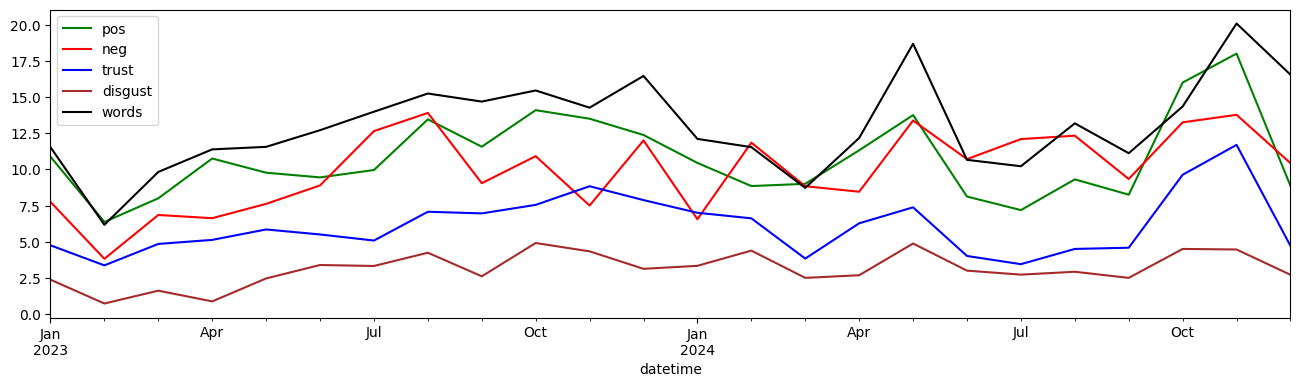

In [ ]:
ax = short_sa_forest_fires_athensvoice_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_sa_forest_fires_athensvoice_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_sa_forest_fires_athensvoice_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_sa_forest_fires_athensvoice_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_sa_forest_fires_athensvoice_df['text'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='datetime'>

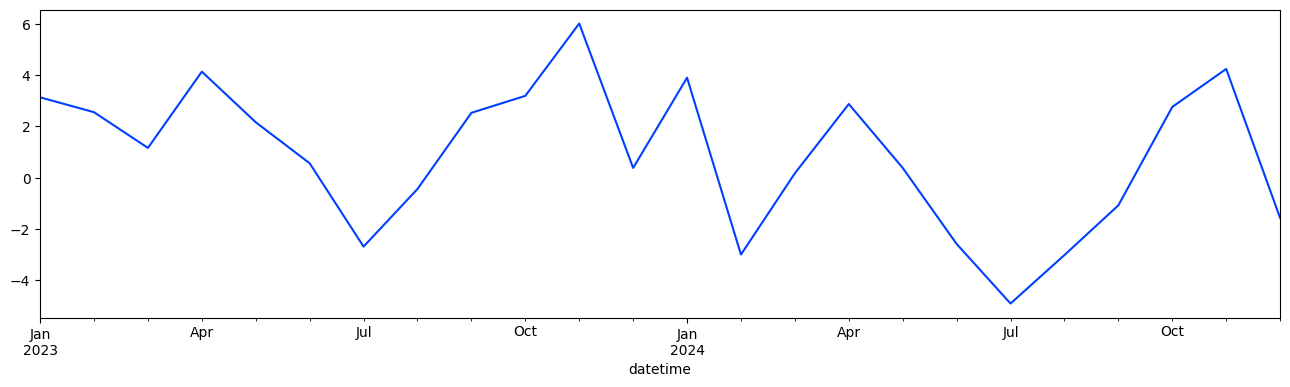

In [ ]:
short_sa_forest_fires_athensvoice_df['pos/neg'] = short_sa_forest_fires_athensvoice_df['positive'] - short_sa_forest_fires_athensvoice_df['negative']
short_sa_forest_fires_athensvoice_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

<Axes: xlabel='datetime'>

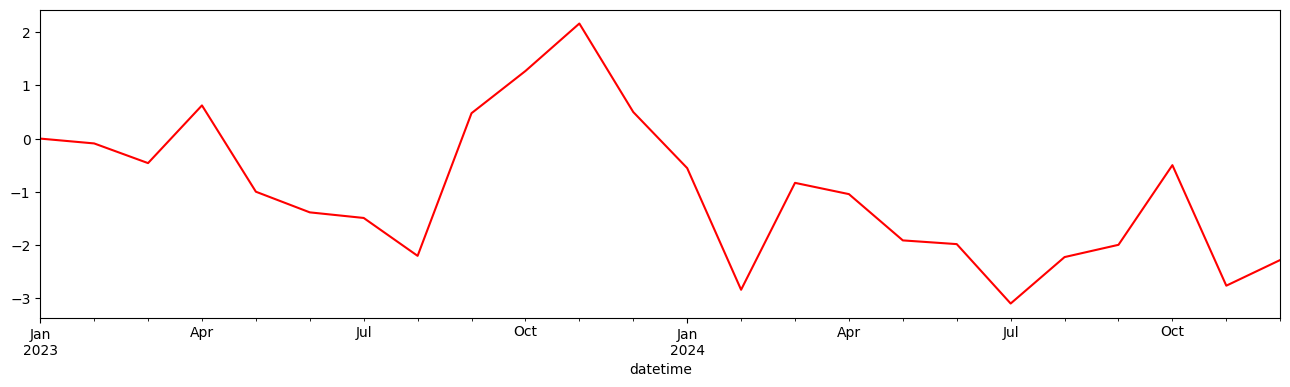

In [ ]:
short_sa_forest_fires_athensvoice_df['joy/sadness'] = short_sa_forest_fires_athensvoice_df['joy'] - short_sa_forest_fires_athensvoice_df['sadness']
short_sa_forest_fires_athensvoice_df['joy/sadness'].resample('ME').mean().plot(figsize=(16,4), color = 'red')

In [ ]:
plt.style.use('grayscale')
# plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

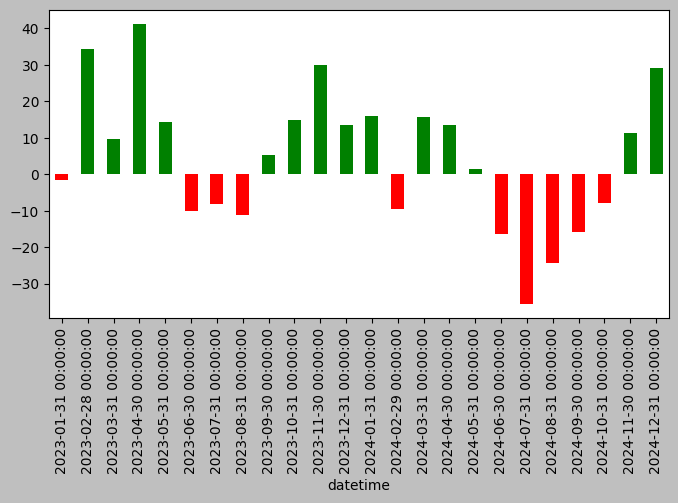

In [ ]:
short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] = short_sa_forest_fires_athensvoice_df.positive*100//short_sa_forest_fires_athensvoice_df[['positive','negative']].sum(
        axis=1) - short_sa_forest_fires_athensvoice_df.negative*100//short_sa_forest_fires_athensvoice_df[['positive','negative']].sum(axis=1)

short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
short_sa_forest_fires_athensvoice_df[(short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2024-10-16 15:00:00,23,0,1,-100.0
2024-09-28 06:15:39,29,0,1,-100.0
2024-08-26 14:00:36,41,4,0,100.0
2024-08-21 11:54:00,52,0,4,-100.0
2024-08-13 15:18:31,70,0,3,-100.0
2024-08-10 16:45:31,81,0,10,-100.0
2024-06-22 15:10:00,192,1,0,100.0
2024-06-08 15:32:10,233,3,0,100.0
2024-05-29 08:08:46,245,0,6,-100.0


Ποια είναι αυτά τα άρθρα;

In [ ]:
forest_fires_athensvoice_df.loc[[23, 41], ['article_url','title', 'full_text']]

,article_url,title,full_text
23,https://www.athensvoice.gr/epikairotita/ellada...,Φωτιά σε δασική έκταση στη Σκαλώτη Δράμας - Με...,Φωτιά σε δασική έκταση στη Σκαλώτη Δράμας - Με...
41,https://www.athensvoice.gr/epikairotita/ellada...,Φωτιά σε δασική έκταση κοντά στο καταφύγιο Πετ...,Φωτιά σε δασική έκταση κοντά στο καταφύγιο Πετ...


### Συναισθηματικά δίπολα

Όπως με το polarity που προκύπτει από το ζεύγος positivity/negativity, έτσι και τα 8 βασικά συναισθήματα κατηγοριοποιούνται σε 4 συναισθηματικά δίπολα:
- χαρά/λύπη,
- εμπιστοσύνη/αποστροφή,
- φόβος/θυμός,
- έκπληξη/προσμονή

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Plutchik-wheel.svg/800px-Plutchik-wheel.svg.png)

Εικόνα: Ο τροχός του Plutchik

Για την κατηγοριοποίηση των συναισθημάτων:
[Emotional classification](https://en.wikipedia.org/wiki/Emotion_classification)